In [1]:
#installed libraries and software:
#pip install mysql-connector-python
#we need to install MySQL on the PC (https://dev.mysql.com/downloads/installer/)

In [2]:
#importing python libraries and modules

#libraries & modules
import numpy as np #library for scientific computing
import pandas as pd #library for dataframes 
import matplotlib.pyplot as plt #graphic library
import seaborn as sns #advanced graphic library based on matplotlib
import warnings #library to manage warnings
import mysql.connector

warnings.filterwarnings('ignore')

### Exercici 1 (Nivell 1)
#### Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python.

In [3]:
#creating connection to MySQL
mydb = mysql.connector.connect(host="localhost", user="daniel", password="password")

In [4]:
#creating a database
mycursor = mydb.cursor()

#it removes the old database and data to create an empty new one (for practice reasons)
sql1 = "DROP DATABASE IF EXISTS mymusicdb"
mycursor.execute(sql1)

#if creates a database 
mycursor.execute("CREATE DATABASE mymusicdb")

In [5]:
#checking if the database exists
mycursor.execute("SHOW DATABASES")

for x in mycursor:
    print(x)

('information_schema',)
('mymusicdb',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('world',)


In [6]:
#connecting to the database we created
mydb = mysql.connector.connect(host="localhost", user="daniel", password="password", database='mymusicdb')

In [7]:
#creating tables
mycursor = mydb.cursor()

#table with info about composers
sql2 = """
CREATE TABLE IF NOT EXISTS composer
(composerID INT NOT NULL AUTO_INCREMENT,
name VARCHAR(255), firstRelease INT,  PRIMARY KEY (composerID))
"""

#table with music genres
sql3 = """
CREATE TABLE IF NOT EXISTS genre
(genreID INT NOT NULL AUTO_INCREMENT, 
name VARCHAR(255),  PRIMARY KEY (genreID))
"""

#table with albums info
sql4 = """
CREATE TABLE IF NOT EXISTS album
(albumID INT NOT NULL AUTO_INCREMENT , title VARCHAR(255), year INT, 
PRIMARY KEY (albumID),
rating INT,
genreID INT,
FOREIGN KEY (genreID) REFERENCES genre(genreID),
composerID INT,
FOREIGN KEY (composerID) REFERENCES composer(composerID))
"""

mycursor.execute(sql2)
mycursor.execute(sql3)
mycursor.execute(sql4)

mycursor.execute('SHOW TABLES')

for x in mycursor:
    print(x)

('album',)
('composer',)
('genre',)


In [8]:
#inserting values into table composer
sql5 = "INSERT INTO composer (name, firstRelease) VALUES (%s, %s)"
data1 = [('Kitaro', 1978),('Air', 1998), ('Kiko veneno', 1981),('Ennio Morricone', 1955)]

for x in data1:
    mycursor.execute(sql5, x)

mydb.commit()

print(mycursor.rowcount, "record inserted.")

1 record inserted.


In [9]:
#inserting values into table genre
sql6 = "INSERT INTO genre (name) VALUES (%s)"
data2 = [["electronic"],["new age"],['soundtrack'],['pop']]


for x in data2:
    mycursor.execute(sql6, x)

mydb.commit()

print(mycursor.rowcount, "record inserted.")

1 record inserted.


In [10]:
#inserting values into table album
sql7 = "INSERT INTO album (title, year, rating, genreID, composerID) VALUES (%s, %s, %s, %s, %s)"
data3 = [('Full moon story', 1979, 3, 2, 1),
 ('Échate un cantecito', 1992, 4, 4, 3),
 ('Moon Safari',2001, 5, 1, 2),
 ('Cinema Paradiso',1980, 3, 3, 4),
 ('Talkie Walkie',2003, 3, 1, 2),
 ('The Mission',1986, 5, 3, 4)]


for x in data3:
    mycursor.execute(sql7, x)

mydb.commit()

print(mycursor.rowcount, "record inserted.")


1 record inserted.


In [11]:
#displaying data
sql = "SELECT * FROM composer"
mycursor.execute(sql)
composers = mycursor.fetchall()

for x in composers:
    print(x)


(1, 'Kitaro', 1978)
(2, 'Air', 1998)
(3, 'Kiko veneno', 1981)
(4, 'Ennio Morricone', 1955)


In [12]:
#displaying data
sql = "SELECT * FROM genre"
mycursor.execute(sql)
genres = mycursor.fetchall()

for x in genres:
    print(x)

(1, 'electronic')
(2, 'new age')
(3, 'soundtrack')
(4, 'pop')


In [13]:
#displaying data
sql = "SELECT * FROM album"
mycursor.execute(sql)
albums = mycursor.fetchall()

for x in albums:
    print(x)

(1, 'Full moon story', 1979, 3, 2, 1)
(2, 'Échate un cantecito', 1992, 4, 4, 3)
(3, 'Moon Safari', 2001, 5, 1, 2)
(4, 'Cinema Paradiso', 1980, 3, 3, 4)
(5, 'Talkie Walkie', 2003, 3, 1, 2)
(6, 'The Mission', 1986, 5, 3, 4)


### Exercici 2 (Nivell 2)
#### Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.

In [14]:
#it shows info about album, genre and composer joining tables
sql6 = """
SELECT album.albumID, album.title, album.year, album.rating,
genre.name, composer.name, composer.firstRelease
FROM album
INNER JOIN genre 
ON album.genreID = genre.genreID
INNER JOIN composer
ON album.composerID = composer.composerID
"""

mycursor.execute(sql6)
musiclibrary = mycursor.fetchall()

for x in musiclibrary:
    print(x)

(3, 'Moon Safari', 2001, 5, 'electronic', 'Air', 1998)
(5, 'Talkie Walkie', 2003, 3, 'electronic', 'Air', 1998)
(1, 'Full moon story', 1979, 3, 'new age', 'Kitaro', 1978)
(4, 'Cinema Paradiso', 1980, 3, 'soundtrack', 'Ennio Morricone', 1955)
(6, 'The Mission', 1986, 5, 'soundtrack', 'Ennio Morricone', 1955)
(2, 'Échate un cantecito', 1992, 4, 'pop', 'Kiko veneno', 1981)


In [15]:
#it inserts data in a dataframe
columns = ['Album ID', 'Title', 'Year', 'Rating', 'Genre', 'Composer','First Release']
df_musiclibrary = pd.DataFrame(data= musiclibrary, columns=columns)
df_musiclibrary

,Album ID,Title,Year,Rating,Genre,Composer,First Release
0,3,Moon Safari,2001,5,electronic,Air,1998
1,5,Talkie Walkie,2003,3,electronic,Air,1998
2,1,Full moon story,1979,3,new age,Kitaro,1978
3,4,Cinema Paradiso,1980,3,soundtrack,Ennio Morricone,1955
4,6,The Mission,1986,5,soundtrack,Ennio Morricone,1955
5,2,Échate un cantecito,1992,4,pop,Kiko veneno,1981


In [16]:
mycursor.close()

True

### Exercici 3 (Nivell 3)
#### Genera algun gràfic que resumeixi les dades. 

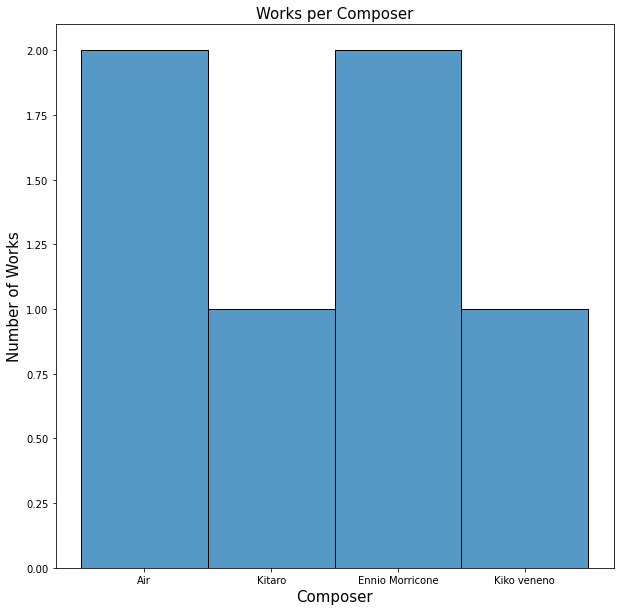

In [17]:
ax = plt.subplots(figsize=(10,10))
ax = sns.histplot(data=df_musiclibrary, x="Composer", stat="count")
ax.set_title("Works per Composer", fontsize=15)
ax.set_xlabel('Composer', fontsize=15) 
ax.set_ylabel('Number of Works', fontsize=15)
plt.show()

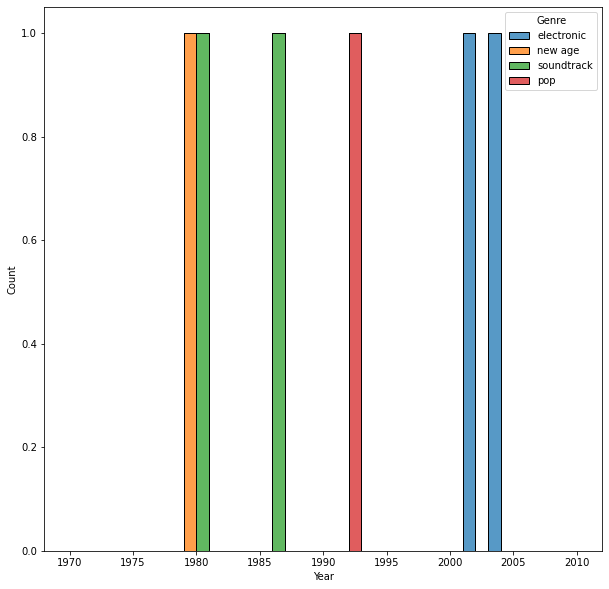

In [18]:
ax = plt.subplots(figsize=(10,10))
ax = sns.histplot(data=df_musiclibrary, x='Year', hue='Genre', multiple='stack',binwidth=1, binrange=(1970,2010))
plt.show()

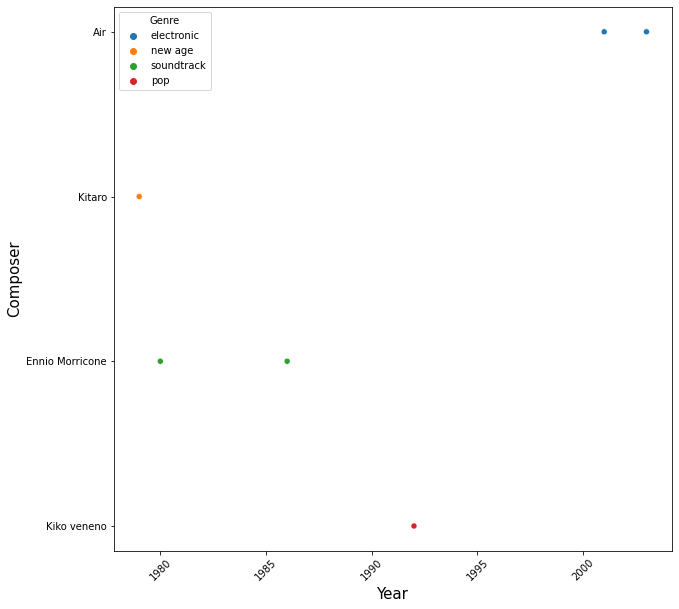

In [19]:
ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(data=df_musiclibrary, x="Year", y="Composer", hue='Genre')
ax.set_xlabel('Year', fontsize=15) 
ax.set_ylabel('Composer', fontsize=15)
plt.xticks(rotation=45)
plt.show()